# data cleaning

In [68]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

# defining global variable path
image_path = "project\\uploads"

def loadImages(path=image_path):
    # Put files into lists and return them as one list of size 4
    image_files = sorted([os.path.join(path, file)
         for file in os.listdir(path) if file.endswith('.JPG')])
 
    return image_files

In [69]:
l=loadImages()
l

['project\\uploads\\IMG_2325.JPG',
 'project\\uploads\\IMG_2371.JPG',
 'project\\uploads\\IMG_2459.JPG',
 'project\\uploads\\IMG_2486.JPG',
 'project\\uploads\\IMG_2824.JPG',
 'project\\uploads\\IMG_2849.JPG',
 'project\\uploads\\IMG_2898.JPG']

In [70]:
# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()

# Preprocessing
def processing(data):

    for i in data:
        img = [cv2.imread(i, cv2.IMREAD_UNCHANGED)]
        print('Original size',img[0].shape)
        # --------------------------------
        # setting dim of the resize
        height = 220
        width = 220
        dim = (width, height)
        res_img = []
        for i in range(len(img)):
            res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
            res_img.append(res)

        # Checcking the size
        print("RESIZED", res_img[i].shape)

        # Visualizing one of the images in the array
        fin = res_img[i]
        display_one(fin,data[i])

Original size (3456, 5184, 3)
RESIZED (220, 220, 3)


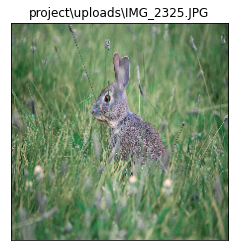

Original size (3456, 5184, 3)
RESIZED (220, 220, 3)


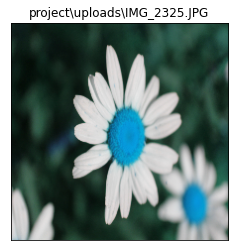

Original size (3456, 5184, 3)
RESIZED (220, 220, 3)


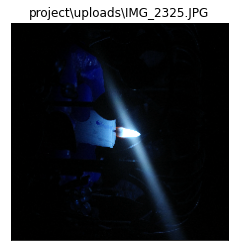

Original size (3456, 5184, 3)
RESIZED (220, 220, 3)


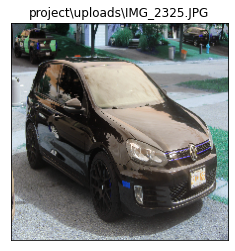

Original size (3456, 4608, 3)
RESIZED (220, 220, 3)


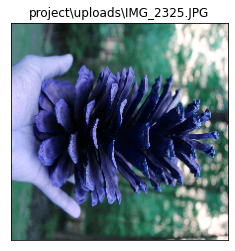

Original size (3456, 5184, 3)
RESIZED (220, 220, 3)


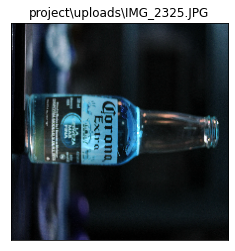

Original size (3456, 5184, 3)
RESIZED (220, 220, 3)


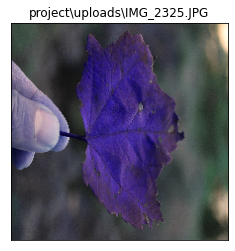

In [71]:
processing(l)

In [72]:
# ----------------------------------
# Remove noise
# Gaussian
# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

def function_process(data):
    i=0
    res_img = []
    for i in data:
        img = [cv2.imread(i, cv2.IMREAD_UNCHANGED)]
        print('Original size',img[0].shape)
        # --------------------------------
        # setting dim of the resize
        height = 220
        width = 220
        dim = (width, height)
        for i in range(len(img)):
            res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
            res_img.append(res)

    for i in range(len(res_img)):
        
        blur = cv2.GaussianBlur(res_img[i], (5, 5), 0)
        display(res_img[i], blur, 'Original', 'Blured')

        # Segmentation
        gray = cv2.cvtColor(res_img[i], cv2.COLOR_RGB2GRAY)
        ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Displaying segmented images
        display(res_img[i], thresh, 'Original', 'Segmented')
        
            # Further noise removal
        kernel = np.ones((3, 3), np.uint8)
        opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

        # sure background area
        sure_bg = cv2.dilate(opening, kernel, iterations=3)

        # Finding sure foreground area
        dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
        ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

        # Finding unknown region
        sure_fg = np.uint8(sure_fg)
        unknown = cv2.subtract(sure_bg, sure_fg)

        #Displaying segmented back ground
        display(res_img[i], sure_bg, 'Original', 'Segmented Background')
        
        # Marker labelling
        ret, markers = cv2.connectedComponents(sure_fg)

        # Add one to all labels so that sure background is not 0, but 1
        markers = markers + 1

        # Now, mark the region of unknown with zero
        markers[unknown == 255] = 0

        markers = cv2.watershed(res_img[i], markers)

        # Displaying markers on the image
        display(res_img[i], markers, 'Original', 'Marked')

Original size (3456, 5184, 3)
Original size (3456, 5184, 3)
Original size (3456, 5184, 3)
Original size (3456, 5184, 3)
Original size (3456, 4608, 3)
Original size (3456, 5184, 3)
Original size (3456, 5184, 3)


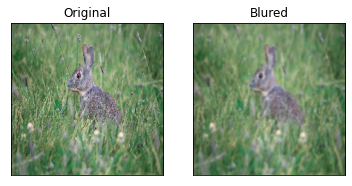

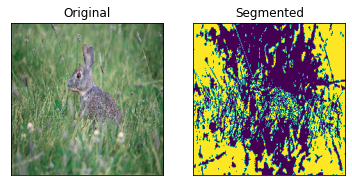

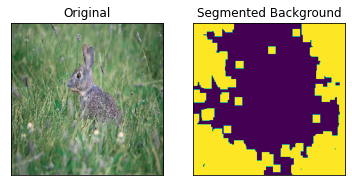

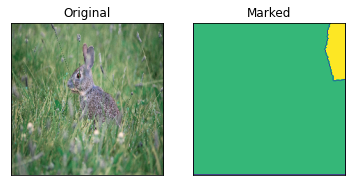

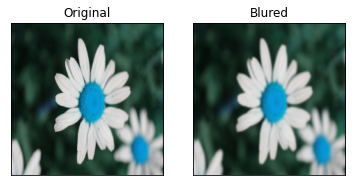

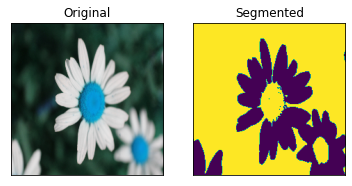

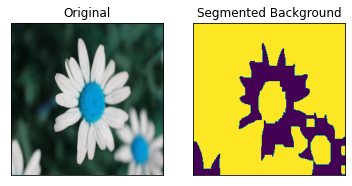

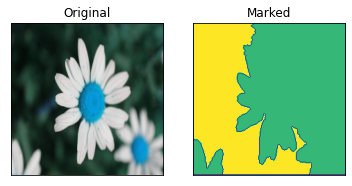

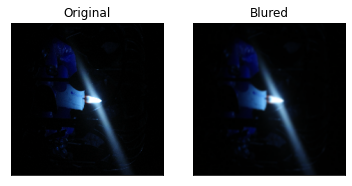

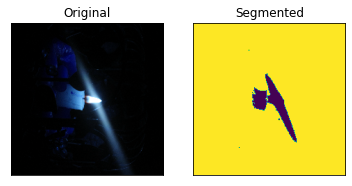

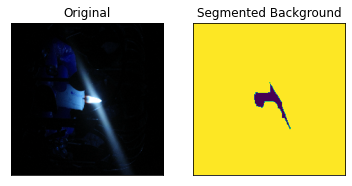

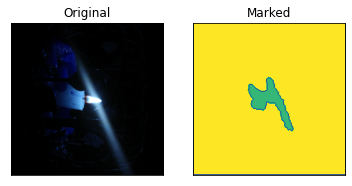

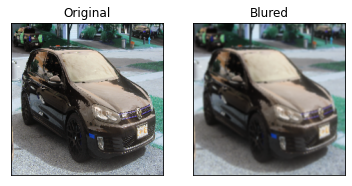

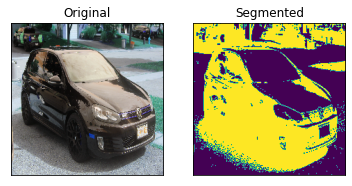

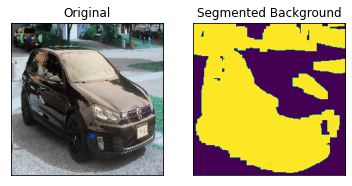

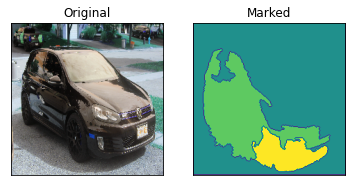

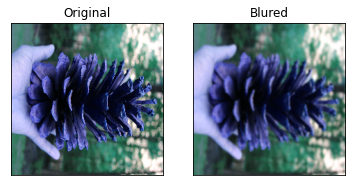

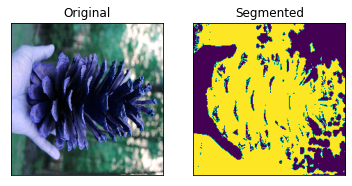

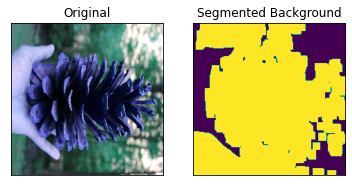

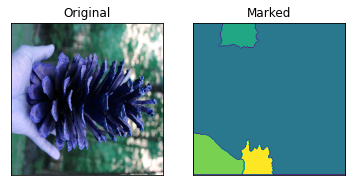

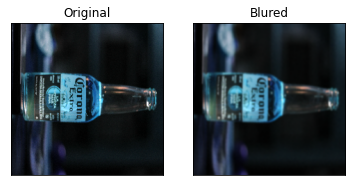

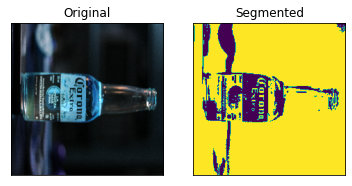

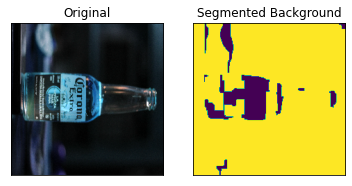

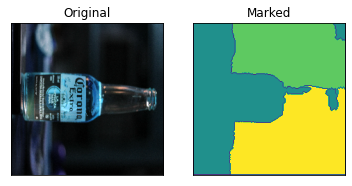

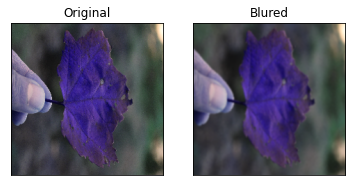

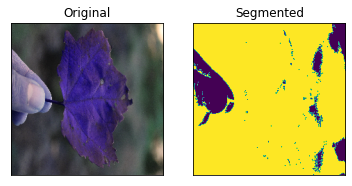

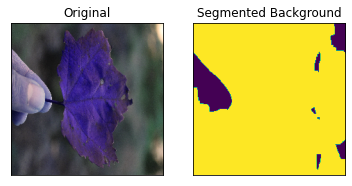

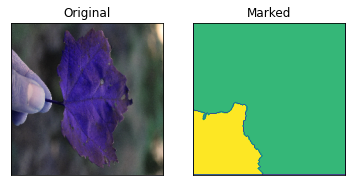

In [73]:
function_process(l)